In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from random_image import makeImage
from PIL import Image

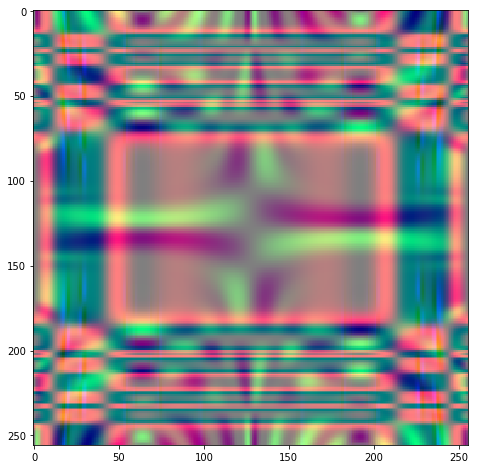

In [2]:
image_dim=256
img = np.array(makeImage(image_dim//2))
plt.figure(None, figsize=(8,8))
plt.imshow(img)
plt.show()

In [3]:
import os
from uuid import uuid4
DATA_PATH = '/home/dl/data/'
PROJECT_PATH = DATA_PATH + 'CAN/'
TEXTURES_PATH = PROJECT_PATH + 'textures/'
os.makedirs(TEXTURES_PATH, exist_ok=True)

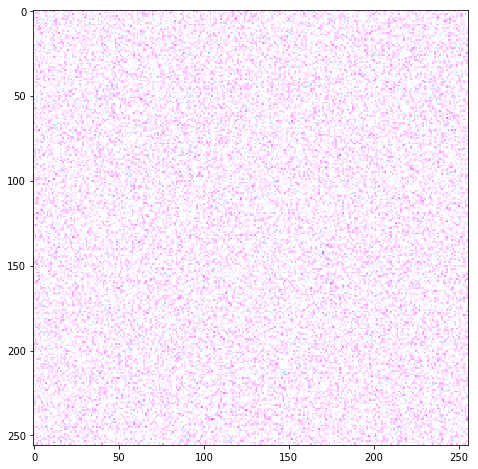

In [4]:
image_dim=256
img = np.zeros((image_dim,image_dim,3))
img[:,:] = np.random.uniform(size=3)
img += np.random.normal(loc=0.5, scale=0.15, size=((image_dim,image_dim,3)))
img = np.clip(img, 0.0, 1.0)
plt.figure(None, figsize=(8,8))
plt.imshow(img)
plt.show()

In [24]:
def generate_image(i = None, image_dim=512):
    np.random.seed() # due to multithreading
    random_val = np.random.rand()
    if random_val < 0.15:
        img = np.zeros((image_dim,image_dim,3))
        img[:,:] = np.random.uniform(size=3)
        img += np.random.normal(loc=0.5, scale=random_val, size=((image_dim,image_dim,3)))
        img = np.clip(img, 0.0, 1.0)
    else:
        img = np.array(makeImage(image_dim//2))
    filename = str(uuid4())[:8] + '.png'
    image.imsave(TEXTURES_PATH + filename, img)

In [33]:
import tqdm
import multiprocessing
num_images = 10000
pool = multiprocessing.Pool(8)
for _ in tqdm.tqdm_notebook(pool.imap_unordered(generate_image, range(num_images)), total=num_images):
    pass
pool.close()
pool.join()

In [34]:
len(os.listdir(TEXTURES_PATH))

20000